## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [2]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]
#data2 = data2[data2.appyear < 2001]

C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
abr_cut = 0.1
data2['external_share'] = data2.external_share.replace(np.nan, -1)
level = np.rint(np.size(data2['tot_cit_correct'].dropna())
                                                   - abr_cut * np.size(data2['tot_cit_correct'].
                                                                   dropna()))
cutoff = np.sort(data2['tot_cit_correct'].dropna())[int(level)]
cutoff

10.6616

In [4]:
#This function will be used to determine whether a patent is abrupt or incremental.
#A patent at the top 10% of expected citations is set to be aprupt

def abrupt(cites, cutoff):
    #The cutoff value that defines an abrupt innovation can be adjusted
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt, cutoff = cutoff)
data2['tot_abr_inc_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_correct']
data2['tot_abr_class_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_class_correct']

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces
#those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)
print(np.mean(data2['Increment']))

0.899991542938089


In [46]:
print(np.size(data2[data2.External == 1]))
print(np.size(data2[data2.External == 0]))

8339860
23164180


<IPython.core.display.Javascript object>


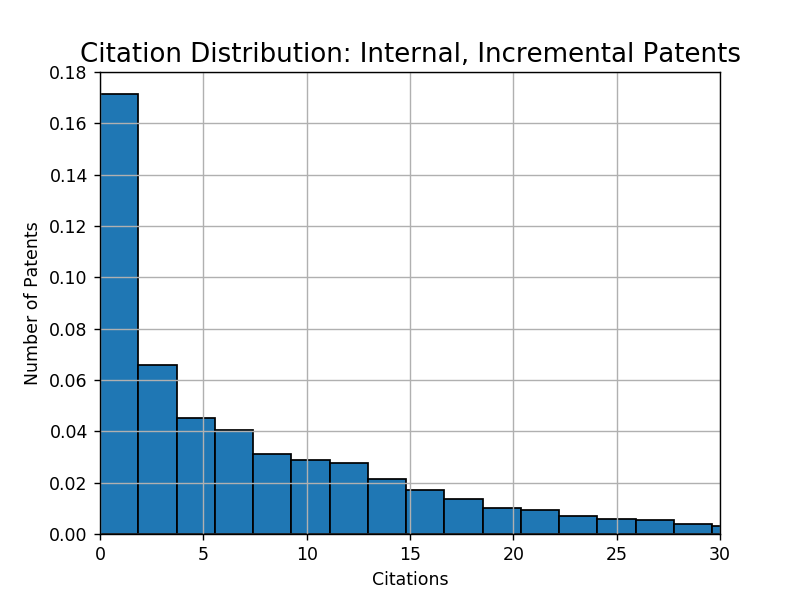

Total, mean, standard deviation: 158130 , 30.207147361667072 , 27.901812388679666


In [167]:
data3 = data2[data2.Increment == 0]
data4 = data3[data3.tot_cit_correct > 0]
data3.hist(column = 'tot_abr_class_cit_correct', normed = True, bins = 200, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0,30])
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

<IPython.core.display.Javascript object>


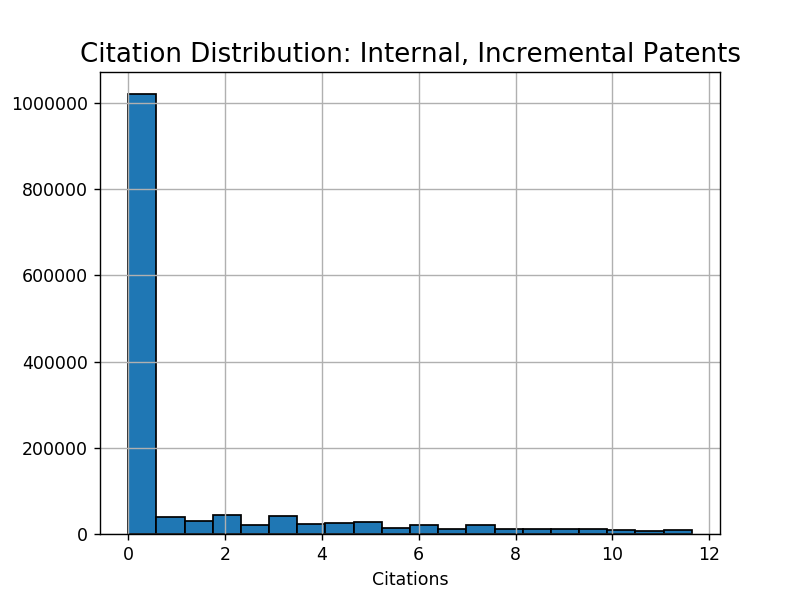

Total, mean, standard deviation: 1417072 , 1.2885910794260005 , 2.5800204973693557


<IPython.core.display.Javascript object>


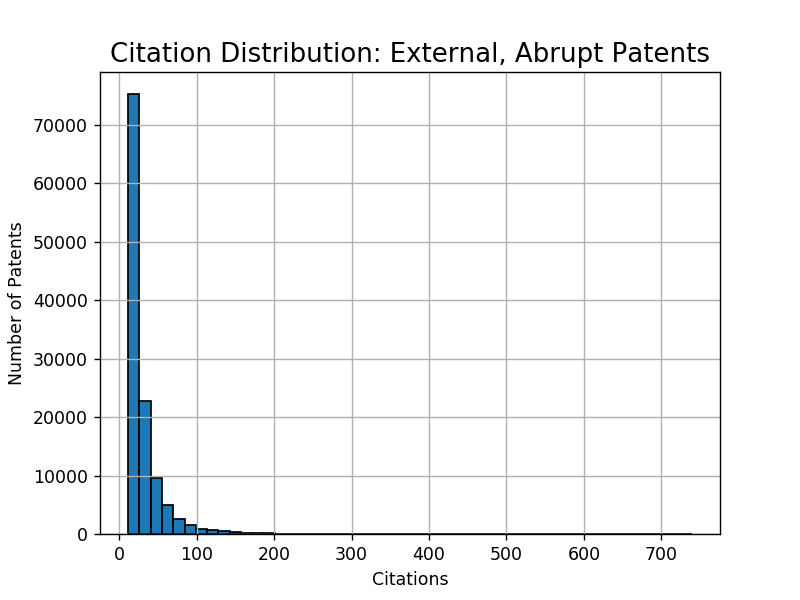

Total, mean, standard deviation: 119686 , 29.9278603061389 , 26.99501996821705


<IPython.core.display.Javascript object>


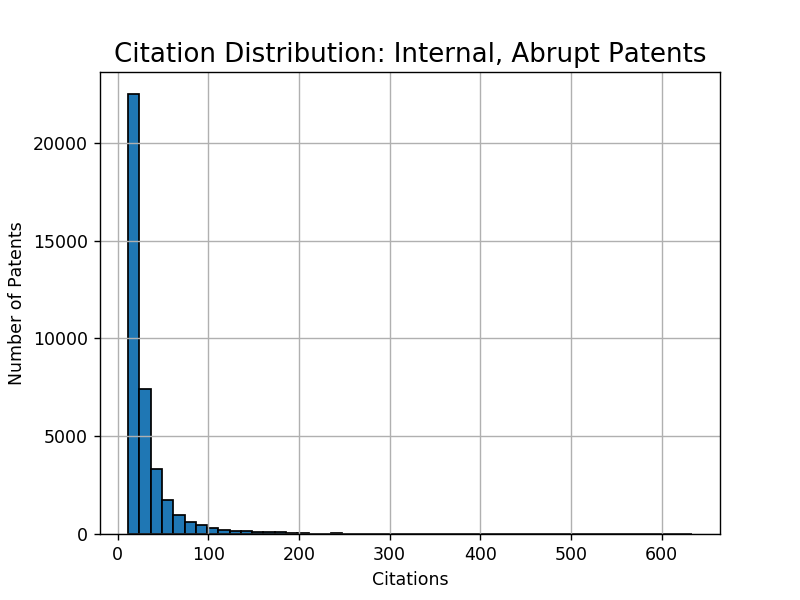

Total, mean, standard deviation: 38444 , 31.076639363750736 , 30.536703233804115


<IPython.core.display.Javascript object>


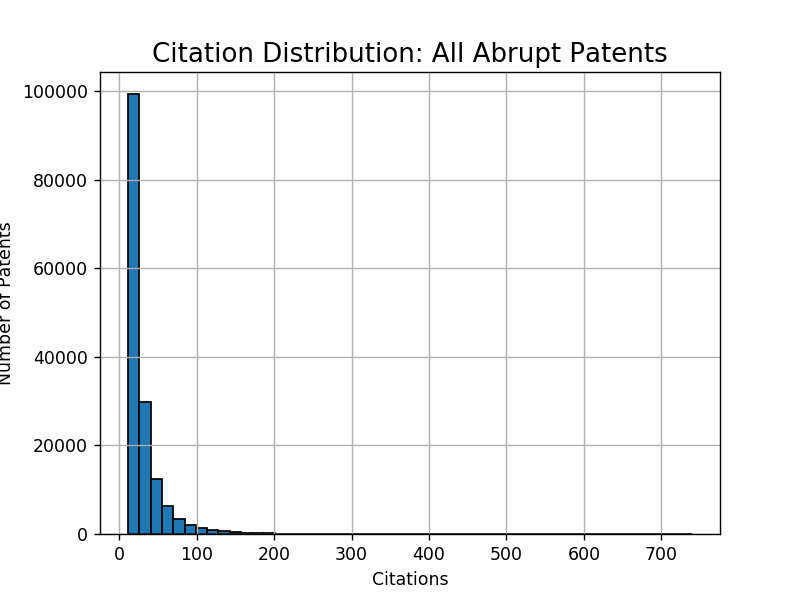

Total, mean, standard deviation: 158130 , 30.207147361667072 , 27.901812388679666


<IPython.core.display.Javascript object>


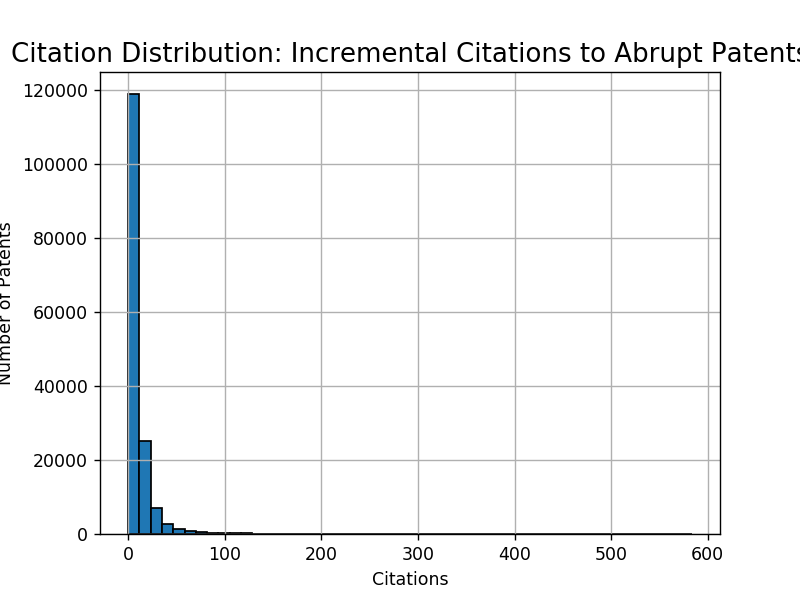

Total, mean, standard deviation: 158130 , 8.907213266300895 , 16.510931968888123


In [48]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct', bins = 20, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total abrupt innovation
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: All Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total incremental citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_inc_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Incremental Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_abr_inc_cit_correct),',',
      np.std(data3.tot_abr_inc_cit_correct))

<IPython.core.display.Javascript object>


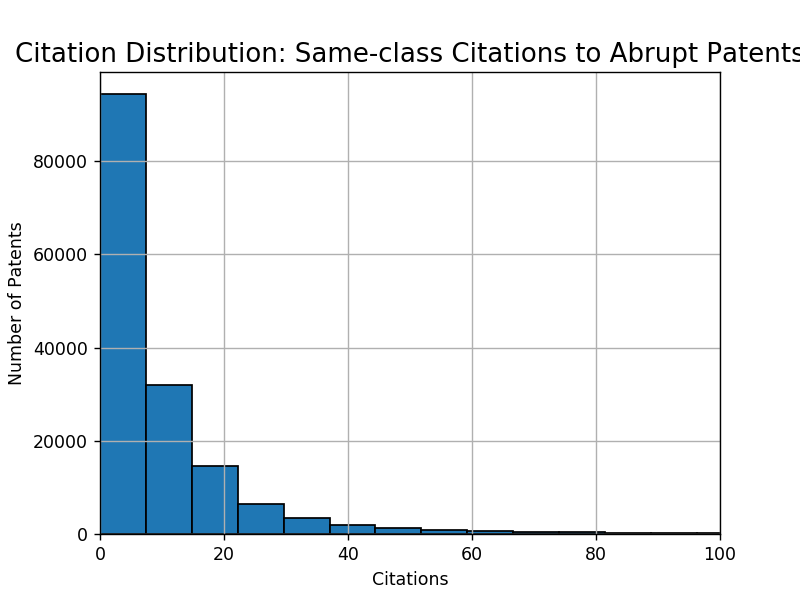

Total, mean, standard deviation: 158130 , 10.056164185797925 , 17.457241701259306
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 297307 , 4.638588264960589 , 2.9057422181178443


In [218]:
#Printing the amount of observations that would be "external incremental"
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(
    data3.tot_abr_class_cit_correct),',', np.std(data3.tot_abr_class_cit_correct))
plt.xlim([0,100])

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#import pylab

#pylab.savefig('SameClass_hist_ex0.png')

## Testing how varying the Parameters affects the distribution (can be used to choose moments)

In [50]:
def pdf_eta2(lambda_inc_0, alpha, tau_lambda_int_abr, ndim):
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    #eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0])
    eta_k_mod = [None] * ndim
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    '''
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_0 * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))**i
    '''
    return eta_k_mod

ndim = 750
lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test = 5.5, .2, .2
print(np.sum(pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim)))

dist_pts = np.arange(ndim)
plt.figure(7)
plt.plot(dist_pts, pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim),
         linewidth=2, color='r')
plt.xlim([0, 30])

1.0


(0, 30)

## Estimation - GMM

In this part, we run a GMM estimation in order to confirm the results we got from the MLE. Because we have control over our choice of moments, we can estimate all 3 parameters all together. We propose 4 moments:

- The average number of citations and the R&D intensity: two global measures of mass that, together, allow for the identification of ($\tau$ + $\lambda_{int,abr}$) and \lambda_{inc,0};
- Mean of the initial ratios: given that the initial incremental R&D effort is a few times bigger than the creative destruction ($\tau$ + $\lambda_{int,abr}$), one would expect the initial reduction of incremental innovation to be related with the decay parameter $\alpha$;
- Sum of the first 2 bins: due to the presence of a significant discontinuity at zero citations (after all, "having ideas" is a highly skewed business), this moment adds an extra weight so as to pin down that effect.

We will define the pdf function for the distribution of $\eta$'s, the functions for the model and data moments, the error function and the criterion function.

In [5]:
def pdf_eta(lambda_inc_k, tau_lambda_int_abr):
        '''
    --------------------------------------------------------------------
    Generate pdf values for the distribution of etas.
    --------------------------------------------------------------------
    INPUTS:
    lambda_inc_k           = (N,) vector, series of incremental lambdas
    tau_lambda_int_abr     = scalar, creative destruction
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    eta_k_mod = (N,) vector, PDF values for each k level
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: eta_k_mod
    --------------------------------------------------------------------
    '''
    
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    eta_k_mod = [None] * len(lambda_inc_k)
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    
    return eta_k_mod

In [6]:
def model_moments(lambda_inc_k, tau_lambda_int_abr):
    '''
    --------------------------------------------------------------------
    This function computes the four model moments for GMM.
    --------------------------------------------------------------------
    INPUTS:
    lambda_inc_k           = (N,) vector, series of incremental lambdas
    tau_lambda_int_abr     = scalar, creative destruction
    
    OBJECTS CREATED WITHIN FUNCTION:
    eta_k_mod      = (N,) vector, PDF values for each k level from model
    lambda_inc_mod = scalar, aggregate incremental lambda (Poisson arrival 
                     rate) from the model
    eta_k_mean_mod = scalar, mean of citations from the model
    share_inc_mod  = scalar, share of incremental R&D from the model
    RD_intens_mod  = scalar, R&D intensity from the model
    eta_ratio_mod  = scalar, ratio of bins from the model
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        pdf_eta()
        
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: eta_k_mean_mod, np.mean(eta_ratio_mod[0:5]),
    np.sum(eta_k_mod[0:2]), RD_intens_mod
    --------------------------------------------------------------------
    '''
    
    eta_k_mod = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    lambda_inc_mod = np.dot(eta_k_mod, lambda_inc_k)
    eta_k_mean_mod = np.dot(eta_k_mod, np.arange(len(lambda_inc_k)))
    share_inc_mod = lambda_inc_mod / (lambda_inc_mod + tau_lambda_int_abr)
    RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k,
                                                                   tau_lambda_int_abr),
                                             np.multiply(lambda_inc_k, lambda_inc_k)
                                            ) / 0.075547
    eta_ratio_mod = np.divide(eta_k_mod[1:6], eta_k_mod[0:5])
    
    return eta_k_mean_mod, np.mean(eta_ratio_mod[0:5]), np.sum(eta_k_mod[0:2]), RD_intens_mod

def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, citation data
    
    OBJECTS CREATED WITHIN FUNCTION:
    eta_k_data      = (N,) vector, PDF values for each k level from the data
    share_inc_data  = scalar, share of incremental R&D from the data (calibration)
    RD_intens_data  = scalar, R&D intensity from the data (calibration)
    eta_ratio_data  = scalar, ratio of bins from the data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: np.mean(xvals), np.mean(eta_ratio_data[0:5]), np.sum(eta_k_data[0:2]),
    RD_intens_data
    --------------------------------------------------------------------
    '''
    unique, counts = np.unique(xvals, return_counts=True)
    eta_k_data = counts / np.size(np.array(xvals))
    share_inc_data = 0.8999
    RD_intens_data = 0.06797109
    eta_ratio_data = np.divide(eta_k_data[1:6], eta_k_data[0:5])
    
    return np.mean(xvals), np.mean(eta_ratio_data[0:5]), np.sum(eta_k_data[0:2]), RD_intens_data

def err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals                  = (N,) vector, citation data
    lambda_inc_k           = (N,) vector, series of incremental lambdas
    tau_lambda_int_abr     = scalar, creative destruction
    simple                 = boolean, =True if errors are simple difference, =False if
                             errors are percent deviation from data moments
    
    OBJECTS CREATED WITHIN FUNCTION:
    eta_k_mean_mod      = scalar, mean of citations from the model
    eta_ratio_sum_mod   = scalar, ratio of bins from the model
    eta_first2_mod      = scalar, sum of the first two bins from the model
    RD_intens_mod       = scalar, R&D intensity from the model
    moms_mod            = (4, 1) matrix, column vector of model moments
    eta_k_mean_data     = scalar, mean of citations from the data
    eta_ratio_sum_data  = scalar, ratio of bins from the data
    eta_first2_data     = scalar, sum of the first two bins from the data
    RD_intens_data      = scalar, R&D intensity from the data
    moms_data           = (4, 1) matrix, column vector of data moments
    err_vec             = (4, 1) matrix, column vector of four moment error
                          functions
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        model_moments()
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    ------
    ''''
        
    eta_k_mean_mod, eta_ratio_sum_mod, eta_first2_mod, RD_intens_mod = model_moments(
        lambda_inc_k, tau_lambda_int_abr)
    moms_mod = np.array([[eta_k_mean_mod], [eta_ratio_sum_mod], [eta_first2_mod], [RD_intens_mod]])
    eta_k_mean_data, eta_ratio_sum_data, eta_first2_data, RD_intens_data = data_moments(xvals)
    moms_data = np.array([[eta_k_mean_data], [eta_ratio_sum_data], [eta_first2_data], [RD_intens_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_abr_distr(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params              = (4,) vector, ([tau_lambda_int_abr, lambda_inc_0, alpha])
    tau_lambda_int_abr  = scalar, creative destruction
    lambda_inc_0        = scalar, Poisson arrival for the incremental R&D at the first level
    alpha               = scalar, incremental decay
    args                = length 3 tuple, (xvals, W, ndim)
    xvals               = (N,) vector, citation data
    W                   = (R, R) matrix, estimate of optimal weighting matrix
    ndim                = scalar, numerical cutoff for the data space
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec()
    
    OBJECTS CREATED WITHIN FUNCTION:
    seq          = (N,) vector, number of incremental steps
    lambda_inc_k = (N,) vector, series of incremental lambdas
    err          = (4, 1) matrix, column vector of four moment error
                   functions
    crit_val     = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

Before the minimization routine, we get the data that we will use in the minimization.

In [7]:
cit_abr = data2[(data2.Increment == 0)]
abr_dist_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna().value_counts()) / np.size(
    np.array(cit_abr.tot_abr_class_cit_correct.dropna()))

15491
10.06398987669824


0.0025897561929526919

Minimization routine: we use the $I$ matrix as weighting matrix. The optimization looks robust for different initial values.

In [1]:
tau_lambda_int_abr_init = 0.8
lambda_inc_0_init = 1
alpha_init = 0.8
W_hat = np.eye(4)
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(0.5, 1-1e-5))
ndim = 750  #This is the number of dimensions that we will sum over. I use 750 because 741
            #is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat, ndim)

results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM = results_abr_distr.x
print('tau_lambda_int_abr_GMM=', tau_lambda_int_abr_GMM, 'lambda_inc_0_GMM=', lambda_inc_0_GMM,
      'alpha_GMM=', alpha_GMM)
print(results_abr_distr.fun)

NameError: name 'np' is not defined

In [ ]:
results_abr_distr

We can also use Basin Hopping to check the minimum that we've found.

In [105]:
#this can take a long while depending on niter
bh_results = opt.basinhopping(crit_abr_distr, params_init,niter=50,
                              minimizer_kwargs={'args':(gmm_args),'method':'L-BFGS-B',
                                                'tol':1e-13,'bounds':bnds})

In [106]:
print(bh_results)
#tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM = bh_results.x

                        fun: array([[ 0.09823153]])
 lowest_optimization_result:       fun: array([[ 0.09823153]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.09277040e-06,  -4.30211422e-08,  -2.59848213e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 152
      nit: 19
   status: 0
  success: True
        x: array([ 0.04273324,  0.35345143,  0.99999   ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 2
                       nfev: 8776
                        nit: 50
                          x: array([ 0.04273324,  0.35345143,  0.99999   ])


Now we calculate the optimal moments.

In [ ]:
eta_k_mean_mod, eta_ratio_sum_mod, eta_first2_mod, RD_intens_mod

In [151]:
seq = np.arange(ndim)
lambda_inc_k_GMM = np.array(lambda_inc_0_GMM * alpha_GMM**seq)
eta_k_mean_data, eta_ratio_sum_data, eta_first2_data, RD_intens_data = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod, eta_ratio_sum_mod, eta_first2_mod, RD_intens_mod = model_moments(lambda_inc_k_GMM,
                                                              tau_lambda_int_abr_GMM)

err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False).reshape(4,)
print('eta_k_mean_mod = ', eta_k_mean_mod, 'eta_ratio_sum_mod = ', eta_ratio_sum_mod,
      'eta_first2_mod = ', eta_first2_mod, 'RD_intens_mod = ', RD_intens_mod)
print('eta_k_mean_data = ', eta_k_mean_data, 'eta_ratio_sum_data = ', eta_ratio_sum_data,
      'eta_first2_data = ', eta_first2_data, 'RD_intens_data = ', RD_intens_data)
print('Error vector=', err1)

eta_k_mean_mod =  8.2605664005 eta_mean_mod =  0.949909417744 bpct_4_mod =  0.157729884107 RD_intens_mod =  0.0662420382355
eta_k_mean_data =  10.0561641858 eta_mean_data =  0.750020441015 bpct_4_data =  0.247524188958 RD_intens_data =  0.06797109
Error vector= [-0.17855693  0.26651137 -0.36276982 -0.02543805]


The match looks good. Let's check some other moments and the sum of $\eta$'s and plot the curve:

In [92]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM))
lambda_inc_GMM = np.dot(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM), lambda_inc_k_GMM)
print(sum_eta, lambda_inc_GMM, tau_lambda_int_abr_GMM)

1.0 0.351163143138 0.0475408287748


<IPython.core.display.Javascript object>


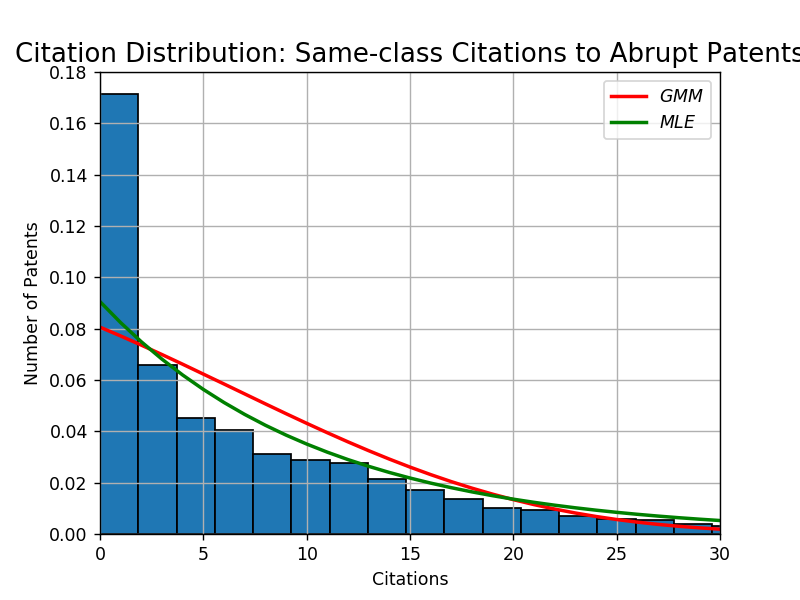

In [219]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 200, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM),
         linewidth=2, color='r', label='$GMM$')
plt.legend(loc='upper right')
plt.xlim([0, 30])

plt.plot(dist_pts, pdf_eta2(lambda_inc_0_MLE, alpha_MLE, tau_lambda_int_abr_MLE, ndim),
         linewidth=2, color='g', label='$MLE$')
plt.legend(loc='upper right')

### Robustness

Here, we will check the match of our GMM estimation to one untargeted moment: the share of incremental R&D over total innovation effort:

In [81]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod = lambda_inc_GMM / (lambda_inc_GMM + tau_lambda_int_abr_GMM)

print('share_inc_data = ', share_inc_data, 'share_inc_mod = ', share_inc_mod)

NameError: name 'lambda_inc_GMM' is not defined

The match looks good!